--- Linear Regression Results for Target: danceability ---
Mean Squared Error (MSE): 0.0195
R-squared Score: 0.3616


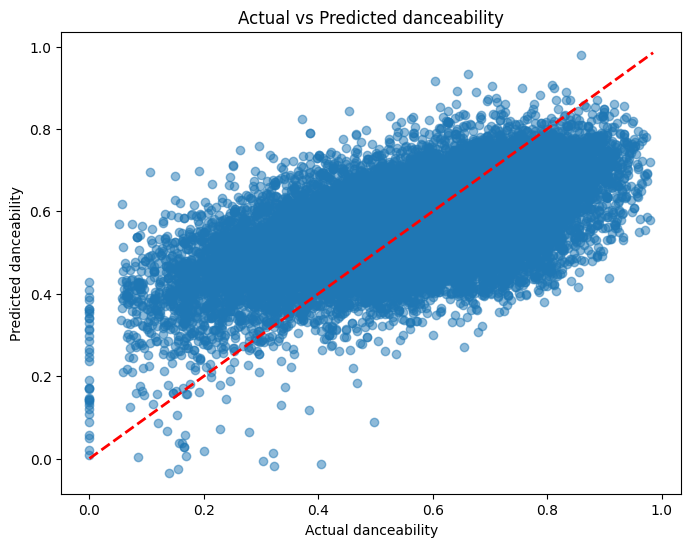


Feature Coefficients:
                   Coefficient
valence           3.209181e-01
speechiness       2.235545e-01
time_signature    4.925120e-02
explicit          4.159618e-02
instrumentalness  3.766755e-02
loudness          9.942206e-03
key               4.208298e-04
popularity        3.177791e-04
Unnamed: 0        2.516886e-08
duration_ms       5.321394e-09
tempo            -6.498685e-04
mode             -2.038551e-02
acousticness     -1.076968e-01
liveness         -1.106818e-01
energy           -2.430928e-01


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the dataset
# Make sure 'dataset.csv' is in the "Data" folder or the same folder as your notebook
# Based on your screenshot, it might be inside the 'Data' folder or just 'dataset.csv'
try:
    df = pd.read_csv('dataset.csv')
except FileNotFoundError:
    # Try looking in the Data folder if it fails
    df = pd.read_csv('Data/dataset.csv')

# 2. Data Preprocessing
# Drop duplicates just in case
df = df.drop_duplicates()

# Drop non-numeric columns that aren't useful for simple regression
# (track_id, artists, album_name, track_name)
# We will also drop 'track_genre' for this simple model, but you could One-Hot Encode it if required.
columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

# Convert 'explicit' column from boolean (True/False) to numeric (1/0) if necessary
if 'explicit' in df_clean.columns:
    df_clean['explicit'] = df_clean['explicit'].astype(int)

# Check for missing values and drop them
df_clean = df_clean.dropna()

# 3. Define Target and Features
# You asked to use danceability OR energy as the target. 
# Here we use 'danceability'. To use 'energy', just change the target_col variable.
target_col = 'danceability' 

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Prediction and Evaluation
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- Linear Regression Results for Target: {target_col} ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# 7. (Optional) Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Diagonal line
plt.xlabel(f'Actual {target_col}')
plt.ylabel(f'Predicted {target_col}')
plt.title(f'Actual vs Predicted {target_col}')
plt.show()

# 8. (Optional) See which features matter most
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))